In [39]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from ipywidgets import interact
from PIL import Image

print(tf.VERSION)
print(keras.__version__)

1.12.0
2.1.6-tf


In [26]:
letters_mnist = keras.datasets.mnist

In [27]:
(train_images, train_labels), (test_images, test_labels) = letters_mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

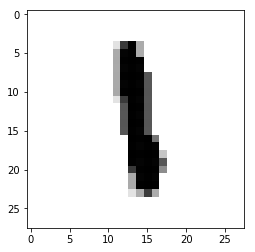

In [29]:
plt.imshow(train_images[200], cmap='binary')

In [30]:
output_labels = list(sorted(set(train_labels)))


In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

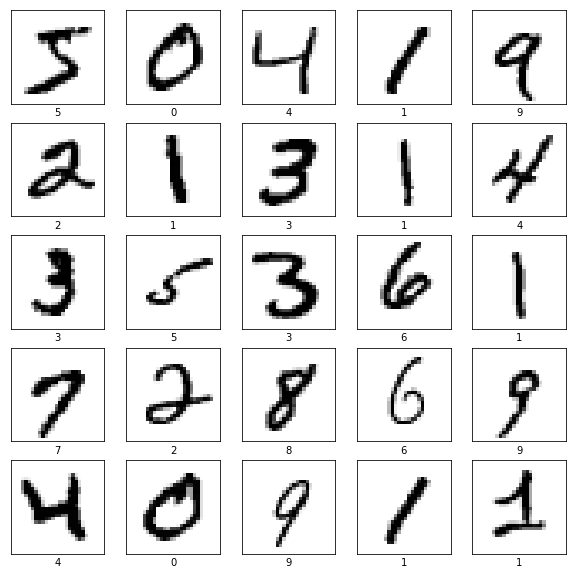

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(train_labels[i])

In [33]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              #loss='mean_squared_error',
             metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2620 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1142 - acc: 0.9665
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0778 - acc: 0.9760
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0585 - acc: 0.9820
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0447 - acc: 0.9858


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [38]:
test_loss, test_acc

(0.07597127379402518, 0.9776)

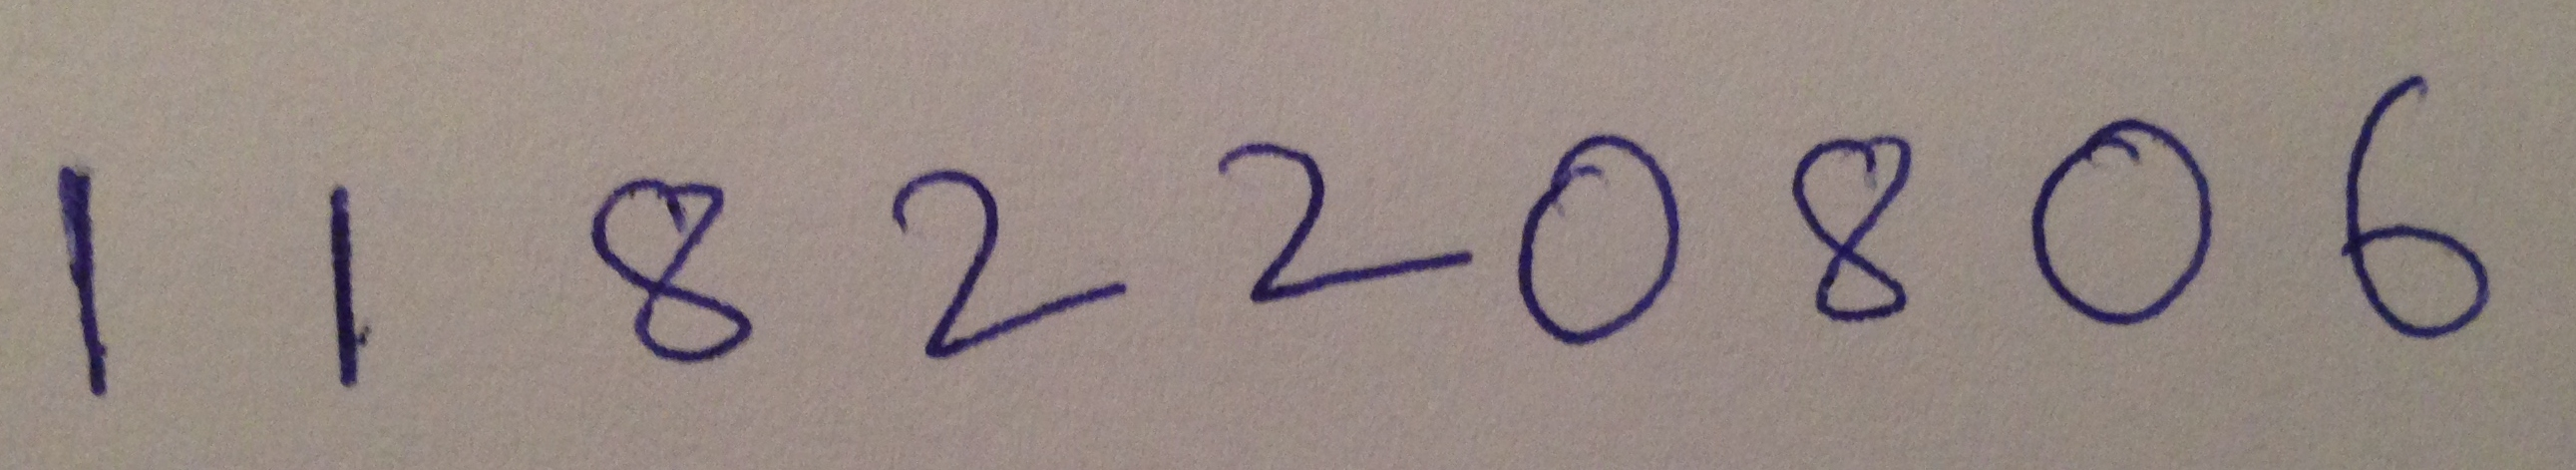

In [44]:
image = Image.open("std_num.JPG")
image

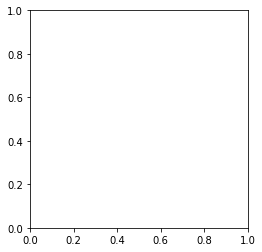

In [57]:
@interact(left=(0, image.size[0]-2), top=(0, image.size[1]-2), right=(0,image.size[0]-2),
          bottom=(0, image.size[1]-2))
def cropImage(fileName="cropped.png", left=0, top=0, right=image.size[0], bottom=image.size[1]):
    croppedImage = image.crop([left, top, right, bottom])
    plt.close()
    plt.imshow(croppedImage)
    croppedImage.save(fileName)
    plt.show()

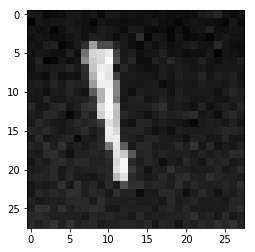

In [60]:
digit = Image.open("cropped.png").resize((28,28))
plt.imshow(digit)
digit = np.array(digit.convert("L"))
plt.imshow(digit, cmap="binary")

digit = (np.max(digit) - digit) / (np.max(digit) - np.min(digit))


In [19]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
